In [18]:
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime

In [19]:
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.models as models
# We use models.Model which is the same as keras.Model
import tensorflow.keras.layers as layers
import tensorflow.keras.activations as Activation
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

In [20]:
# load data
X_test = np.load("project_data/project/X_test.npy")
y_test = np.load("project_data/project/y_test.npy")
person_train_valid = np.load("project_data/project/person_train_valid.npy")
X_train_valid = np.load("project_data/project/X_train_valid.npy")
y_train_valid = np.load("project_data/project/y_train_valid.npy")
person_test = np.load("project_data/project/person_test.npy")

In [21]:
# adjust label values
y_train_valid -= 769
y_test -= 769

In [22]:
print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))

Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


In [23]:
# split into train and validation set. Assumes iid
perm = np.random.permutation(X_train_valid.shape[0])
numTrain = int(0.8*X_train_valid.shape[0])
numVal = X_train_valid.shape[0] - numTrain
Xtrain = X_train_valid[perm[0:numTrain]]
ytrain = y_train_valid[perm[0:numTrain]]
Xval = X_train_valid[perm[numTrain: ]]
yval = y_train_valid[perm[numTrain: ]]

In [24]:
def Ksquare(x):
    return tf.pow(x, 2)
def Klog(x):
    return tf.math.log(x)

In [25]:
'''
# Building a Sequential model:
model = models.Sequential()
model.add(layers.Permute((2, 1), input_shape=(22, 1000))) # (batch, 22, 1000) -> (batch, 1000, 22)
model.add(layers.SimpleRNN(50)) # (batch, 1000, 22) -> (batch, hidden_dim)
model.add(layers.Dense(4, activation='softmax')) # (batch, hidden_dim) -> (batch, 4)
'''

"\n# Building a Sequential model:\nmodel = models.Sequential()\nmodel.add(layers.Permute((2, 1), input_shape=(22, 1000))) # (batch, 22, 1000) -> (batch, 1000, 22)\nmodel.add(layers.SimpleRNN(50)) # (batch, 1000, 22) -> (batch, hidden_dim)\nmodel.add(layers.Dense(4, activation='softmax')) # (batch, hidden_dim) -> (batch, 4)\n"

In [26]:

# Shallow LSTM: Test accuracy:  0.239277645945549
model = models.Sequential()
model.add(layers.Permute((2, 1), input_shape=(22, 1000))) 
model.add(layers.LSTM(50)) 
model.add(layers.Dense(4, activation='softmax')) 


In [27]:
'''
# Shallow GRU: Test accuracy:  0.2618510127067566
model = models.Sequential()
model.add(layers.Permute((2, 1), input_shape=(22, 1000)))
model.add(layers.GRU(50))
model.add(layers.Dense(4, activation='softmax')) 
'''

"\n# Shallow GRU: Test accuracy:  0.2618510127067566\nmodel = models.Sequential()\nmodel.add(layers.Permute((2, 1), input_shape=(22, 1000)))\nmodel.add(layers.GRU(50))\nmodel.add(layers.Dense(4, activation='softmax')) \n"

In [30]:
model.compile(keras.optimizers.Adam(), 'sparse_categorical_crossentropy', metrics=['acc'])
#model.compile(keras.optimizers.Adam(), keras.losses.SparseCategoricalCrossentropy(), 
#             metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
permute_1 (Permute)          (None, 1000, 22)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 50)                14600     
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 204       
Total params: 14,804
Trainable params: 14,804
Non-trainable params: 0
_________________________________________________________________


In [32]:
loss_hist = model.fit(Xtrain, ytrain, validation_data = (Xval, yval), epochs = 50, verbose=True)

Epoch 1/50
53/53 [==============================] - 18s 344ms/step - loss: 1.4449 - acc: 0.2636 - val_loss: 1.4614 - val_acc: 0.2435
Epoch 2/50
53/53 [==============================] - 17s 321ms/step - loss: 1.3705 - acc: 0.3239 - val_loss: 1.4473 - val_acc: 0.2553
Epoch 3/50
53/53 [==============================] - 17s 325ms/step - loss: 1.3384 - acc: 0.3446 - val_loss: 1.4507 - val_acc: 0.2411
Epoch 4/50
53/53 [==============================] - 17s 321ms/step - loss: 1.3176 - acc: 0.3765 - val_loss: 1.4680 - val_acc: 0.2009
Epoch 5/50
53/53 [==============================] - 16s 306ms/step - loss: 1.2988 - acc: 0.3918 - val_loss: 1.4432 - val_acc: 0.2435
Epoch 6/50
53/53 [==============================] - 17s 319ms/step - loss: 1.2776 - acc: 0.4108 - val_loss: 1.4628 - val_acc: 0.2199
Epoch 7/50
53/53 [==============================] - 17s 329ms/step - loss: 1.2603 - acc: 0.4391 - val_loss: 1.4669 - val_acc: 0.2270
Epoch 8/50
53/53 [==============================] - 16s 295ms/step - 

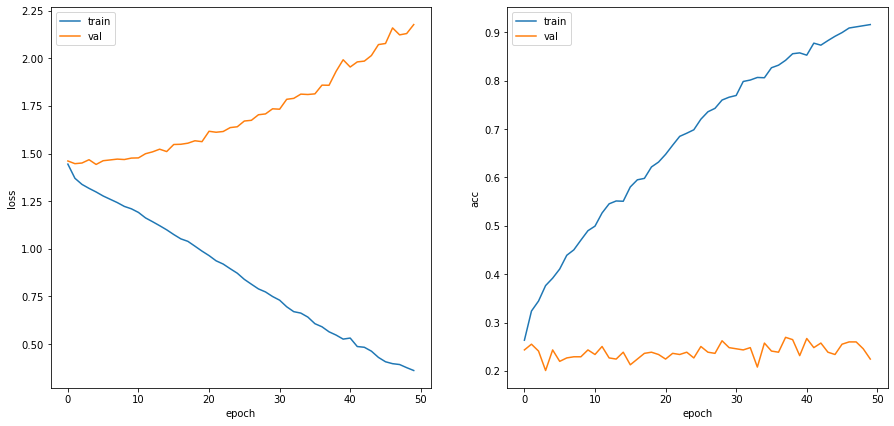

In [33]:
hist = loss_hist.history

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

plt.subplot(1, 2, 2)
plt.plot(hist['acc'])
plt.plot(hist['val_acc'])
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

In [34]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test accuracy: ", score[1])

Test accuracy:  0.239277645945549
